In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
df_GLS = pd.read_csv(r'data_cleaned/merged_GLSfitted.csv')
df_GLS.head()

,index,name_exoplanet.eu,star_name,name_exoclock+holczer,T0_(BJD_TDB),T0_unc.,P_(days),P_unc.,mass,mass_error,...,Attv2,Nbest,scatter,bic0,bic1,bic2,delta_bic,fap,sampled_f,TTV_strength
0,51,HAT-P-26 b,HAT-P-26,HAT-P-26b,2.457197e+06,0.00007,4.234501,3.200000e-07,0.058500,0.007170,...,NaN,1.0,0.892727,93.556893,78.505492,76.171449,15.051401,0.011630,6134.0,no_TTV
1,52,HAT-P-26 d,HAT-P-26,NaN,NaN,NaN,NaN,NaN,0.020569,0.003319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,53,HAT-P-27 Ac,HAT-P-27 A,NaN,NaN,NaN,NaN,NaN,0.066608,0.016082,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54,HAT-P-27 Ab,HAT-P-27 A,HAT-P-27b,2.457645e+06,0.00014,3.039578,2.400000e-07,0.660000,0.033000,...,NaN,1.0,0.605749,55.152519,43.629089,48.202776,11.523429,0.186055,8149.0,no_TTV
4,157,HD 106315 b,HD 106315,NaN,NaN,NaN,NaN,NaN,0.033000,0.009800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df_data = pd.read_csv(r'data_cleaned/Holczer-TTV_fits_mapped.csv')
df_data.head()

,kepler_name,Model,Per2,e_Per2,Amp,e_Amp,Res
0,Kepler-24b,Cos,439.7,7.7,30.0,4.5,25.0
1,Kepler-759b,Cos,1450.0,100.0,70.0,16.0,23.0
2,Kepler-276d,Cos,824.0,40.0,79.0,14.0,33.0
3,Kepler-765b,Cos,1630.0,150.0,20.7,4.3,13.0
4,Kepler-24c,Cos,413.0,6.7,43.8,6.1,33.0


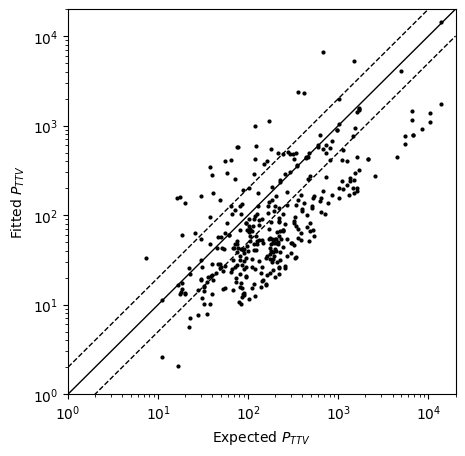

In [49]:
# Expected Pttv vs Fitted Pttv
plt.figure(figsize=(5,5))
lim = np.array([1e+0, 2e+4])

plt.errorbar(x=df_GLS.expected_Pttv, y=df_GLS.Pttv, yerr=df_GLS.Pttv_err,
             c='black', fmt='o', ms=2)
plt.plot(lim, lim, c='black', lw=1)
plt.plot(lim, lim * 2, c='black', ls='--', lw=1)
plt.plot(lim, lim / 2, c='black', ls='--', lw=1)

plt.xscale('log'), plt.yscale('log')

plt.xlim(lim); plt.ylim(lim)
plt.xlabel('Expected $P_{TTV}$'); plt.ylabel('Fitted $P_{TTV}$')
plt.show()

In [41]:
# Our fitted Pttv vs Their fitted Pttv
# Merge first
df = df_data.merge(
    df_GLS,
    left_on='kepler_name',
    right_on='name_exoclock+holczer',
    how='inner'
)
df.tail()

,kepler_name,Model,Per2,e_Per2,Amp,e_Amp,Res,index,name_exoplanet.eu,star_name,...,Attv2,Nbest,scatter,bic0,bic1,bic2,delta_bic,fap,sampled_f,TTV_strength
7,Kepler-1659c,Cos,1483.0,36.0,202.00,15.00,28.0,898,Kepler-1659 c,Kepler-1659,...,0.323635,2.0,2.233333,781.810796,160.712579,97.251804,684.558992,NaN,5000.0,weak
8,Kepler-1662b,Cos,1390.0,130.0,6.20,2.20,5.3,902,Kepler-1662 b,Kepler-1662,...,NaN,1.0,2.100000,59.254516,11.377834,15.571680,47.876682,2.025265e-26,5000.0,weak
9,Kepler-396c,Cos,1303.0,11.0,58.61,0.53,3.1,1731,Kepler-396 c,Kepler-396,...,NaN,1.0,1.610359,52.775075,46.098900,40.897265,6.676175,9.494827e-38,5000.0,no_TTV
10,Kepler-396b,Cos,1518.0,31.0,32.40,1.50,3.4,1730,Kepler-396 b,Kepler-396,...,0.194765,2.0,9.700000,5012.168292,246.211581,101.311806,4910.856487,NaN,5000.0,strong
11,Kepler-405c,Cos,791.0,44.0,24.70,8.50,21.0,1755,Kepler-405 c,Kepler-405,...,NaN,1.0,1.300000,201.677793,150.437778,189.900280,51.240014,2.167838e-11,5000.0,no_TTV


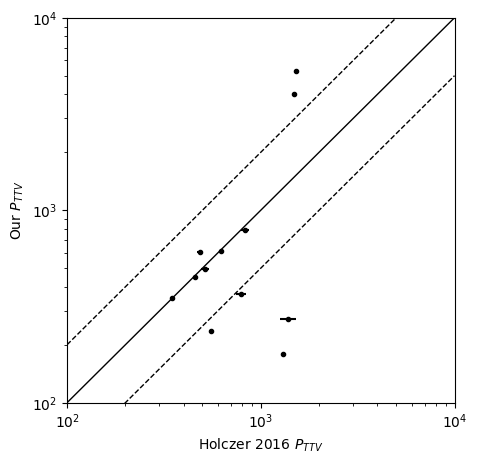

In [48]:
plt.figure(figsize=(5,5))
lim = np.array([1e+2, 1e+4])

plt.errorbar(x=df.Per2, y=df.Pttv, xerr=df.e_Per2, yerr=df.Pttv_err,
             c='black', fmt='o', ms=3)
plt.plot(lim, lim, c='black', lw=1)
plt.plot(lim, lim * 2, c='black', ls='--', lw=1)
plt.plot(lim, lim / 2, c='black', ls='--', lw=1)

plt.xscale('log'), plt.yscale('log')

plt.xlim(lim); plt.ylim(lim)
plt.xlabel('Holczer 2016 $P_{TTV}$'); plt.ylabel('Fitted $P_{TTV}$')
plt.show()